In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_predict, LeaveOneOut
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import learning_curve
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC

import warnings
# Code was showing some warnings, from stack overflow optimal answer was to include this
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
df = pd.read_csv("hyperthyroidism3_FinalDataSet_April.csv", encoding='latin-1')
df.dropna(inplace=True)


In [3]:
X = df.iloc[:, 1:].values
y = df.iloc[:, 0].values  


## Splitting & Using SVM


In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
svm_classifier = SVC(kernel='linear')  

svm_classifier.fit(X_train, y_train)
test_score = svm_classifier.score(X_test, y_test)
y_pred = svm_classifier.predict(X_test)



In [5]:
# from sklearn.model_selection import cross_val_predict, KFold

# num_folds = 5
# svm_classifier = SVC(kernel='linear')
# kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)
# y_pred = cross_val_predict(svm_classifier, X, y, cv=kf)


## Using Evaluation Metrics

Accuracy =  90.66666666666666 %
Precision =  0.9041539291494336
Recall =  0.9067873303167421
F1-score =  0.9053030303030303


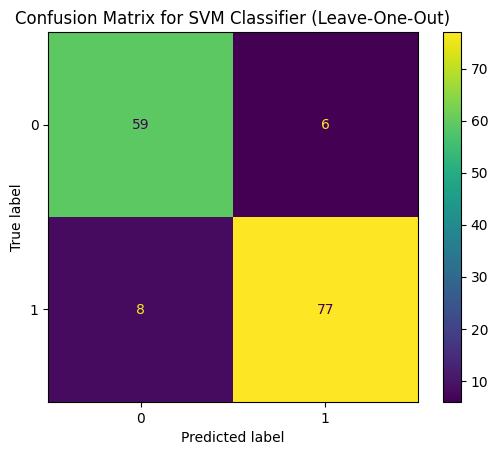

Classification Report
              precision    recall  f1-score   support

           0       0.88      0.91      0.89        65
           1       0.93      0.91      0.92        85

    accuracy                           0.91       150
   macro avg       0.90      0.91      0.91       150
weighted avg       0.91      0.91      0.91       150



In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import LeaveOneOut
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, roc_curve, auc
import matplotlib.pyplot as plt

print("Accuracy = ", accuracy_score(y_test, y_pred) * 100, "%")
print("Precision = ", precision_score(y_test, y_pred,average='macro'))
print("Recall = ", recall_score(y_test, y_pred,average='macro'))
print("F1-score = ", f1_score(y_test, y_pred,average='macro'))
conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=np.unique(y))
disp.plot()
plt.title('Confusion Matrix for SVM Classifier (Leave-One-Out)')
plt.show()
# Using classification report too
print("Classification Report")
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))



In [ ]:
train_sizes, train_scores, test_scores = learning_curve(svm_classifier, X, y, cv=5, train_sizes=np.linspace(0.1, 1.0, 10))

plt.figure()
plt.plot(train_sizes, np.mean(train_scores, axis=1), 'o-', label="Training score")
plt.plot(train_sizes, np.mean(test_scores, axis=1), 'o-', label="Cross-validation score")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.title("Learning Curve")
plt.legend(loc="best")
plt.show()

In [ ]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
import warnings
import sys # For model object size

# Attempt to import psutil for CPU and memory stats
try:
    import psutil
    psutil_available = True
    process = psutil.Process() # Get current process
except ImportError:
    psutil_available = False
    print("psutil library not found. CPU and memory usage stats will not be available.")
    print("To install psutil, run: pip install psutil")

from sklearn.model_selection import train_test_split, learning_curve
from sklearn.svm import SVC # Import SVC
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report,
    ConfusionMatrixDisplay
)
# from sklearn.preprocessing import LabelEncoder # Not strictly needed for SVM if y is numeric

# Code was showing some warnings, from stack overflow optimal answer was to include this
warnings.simplefilter(action='ignore', category=FutureWarning)

# --- 0. Initialize Metrics Storage ---
# Dictionary to store all metrics for later visualization
all_metrics = {}

# --- 1. Load Data ---
# !!! IMPORTANT: Make sure this path is correct for your system !!!
df = pd.read_csv(r"C:\Users\musab\desktop\ht\htOld\dataset\hyperthyroidism3_FinalDataSet_April.csv", encoding='latin-1')


df.dropna(inplace=True)

if df.empty:
    print("DataFrame is empty after dropping NaNs. Exiting.")
    sys.exit()

# Assuming the first column is the target and the rest are features
X = df.iloc[:, 1:].values
y = df.iloc[:, 0].values # SVC can handle string or numeric labels

# Convert feature names to strings, handle potential non-string column names
feature_names = [str(col) for col in df.columns[1:]]
# Get class names for display (ensure they are strings for matplotlib if needed)
class_names_display = [str(c) for c in np.unique(y)]


# --- 2. Split Data ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- 3. Initialize Model ---
# Using SVC with a linear kernel as requested
svm_classifier = SVC(kernel='linear', random_state=42, probability=True) # probability=True for roc_auc if needed later

# --- 4. Train Model and Measure Resources ---
print("\n--- Model Training (Linear SVM) ---")
training_start_time_wall = time.time()
if psutil_available:
    cpu_times_before_train = process.cpu_times()
    mem_info_before_train = process.memory_info().rss

svm_classifier.fit(X_train, y_train)

training_end_time_wall = time.time()
if psutil_available:
    cpu_times_after_train = process.cpu_times()
    mem_info_after_train = process.memory_info().rss

all_metrics['training_wall_time'] = training_end_time_wall - training_start_time_wall
print(f"Training Wall Time: {all_metrics['training_wall_time']:.4f} seconds")

if psutil_available:
    all_metrics['training_cpu_time_user'] = cpu_times_after_train.user - cpu_times_before_train.user
    all_metrics['training_cpu_time_system'] = cpu_times_after_train.system - cpu_times_before_train.system
    all_metrics['memory_rss_after_training_mb'] = mem_info_after_train / (1024**2)
    print(f"Training CPU Time (User): {all_metrics['training_cpu_time_user']:.4f} seconds")
    print(f"Training CPU Time (System): {all_metrics['training_cpu_time_system']:.4f} seconds")
    print(f"Memory RSS after training: {all_metrics['memory_rss_after_training_mb']:.2f} MB")
else:
    all_metrics.update({'training_cpu_time_user': 0, 'training_cpu_time_system': 0, 'memory_rss_after_training_mb': 0})


# --- 5. Make Predictions and Measure Resources ---
print("\n--- Model Prediction (Linear SVM) ---")
prediction_start_time_wall = time.time()
if psutil_available:
    cpu_times_before_predict = process.cpu_times()

y_pred = svm_classifier.predict(X_test)

prediction_end_time_wall = time.time()
if psutil_available:
    cpu_times_after_predict = process.cpu_times()

all_metrics['prediction_wall_time'] = prediction_end_time_wall - prediction_start_time_wall
print(f"Prediction Wall Time (for {len(X_test)} samples): {all_metrics['prediction_wall_time']:.4f} seconds")

if psutil_available:
    all_metrics['prediction_cpu_time_user'] = cpu_times_after_predict.user - cpu_times_before_predict.user
    all_metrics['prediction_cpu_time_system'] = cpu_times_after_predict.system - cpu_times_before_predict.system
    print(f"Prediction CPU Time (User): {all_metrics['prediction_cpu_time_user']:.4f} seconds")
    print(f"Prediction CPU Time (System): {all_metrics['prediction_cpu_time_system']:.4f} seconds")
else:
    all_metrics.update({'prediction_cpu_time_user': 0, 'prediction_cpu_time_system': 0})

# --- 6. Evaluate Model ---
print("\n--- Model Evaluation (Linear SVM) ---")
all_metrics['accuracy'] = accuracy_score(y_test, y_pred) * 100
all_metrics['precision_macro'] = precision_score(y_test, y_pred, average='macro', zero_division=0)
all_metrics['recall_macro'] = recall_score(y_test, y_pred, average='macro', zero_division=0)
all_metrics['f1_score_macro'] = f1_score(y_test, y_pred, average='macro', zero_division=0)

print(f"Accuracy = {all_metrics['accuracy']:.2f} %")
print(f"Precision (Macro) = {all_metrics['precision_macro']:.4f}")
print(f"Recall (Macro) = {all_metrics['recall_macro']:.4f}")
print(f"F1-score (Macro) = {all_metrics['f1_score_macro']:.4f}")

print("\nClassification Report:")
# Ensure target_names are strings for classification_report
target_names_report = [str(c) for c in svm_classifier.classes_] if hasattr(svm_classifier, 'classes_') else class_names_display
print(classification_report(y_test, y_pred, zero_division=0, labels=svm_classifier.classes_ if hasattr(svm_classifier, 'classes_') else None, target_names=target_names_report))

# --- 7. Model Complexity / Parameters ---
print("\n--- Model Parameters (Linear SVM) ---")
params = svm_classifier.get_params()
all_metrics['kernel'] = params.get('kernel')
all_metrics['C_regularization'] = params.get('C')
all_metrics['gamma'] = params.get('gamma') # Will be 'scale' or a value if not linear, or if explicitly set

print(f"Kernel: {all_metrics['kernel']}")
print(f"C (Regularization): {all_metrics['C_regularization']}")
print(f"Gamma: {all_metrics['gamma']}")


if hasattr(svm_classifier, 'n_features_in_'):
    all_metrics['n_features_in'] = svm_classifier.n_features_in_
    print(f"Number of Features Seen: {all_metrics['n_features_in']}")
else:
    all_metrics['n_features_in'] = X_train.shape[1] # Fallback
    print(f"Number of Features Seen (from X_train): {all_metrics['n_features_in']}")

if hasattr(svm_classifier, 'classes_'):
    all_metrics['classes_learned'] = svm_classifier.classes_
    all_metrics['n_classes_learned'] = len(svm_classifier.classes_)
    print(f"Classes Learned: {all_metrics['classes_learned']}")
else:
    all_metrics['classes_learned'] = np.unique(y_train)
    all_metrics['n_classes_learned'] = len(all_metrics['classes_learned'])


if hasattr(svm_classifier, 'n_support_'): # Number of support vectors for each class.
    all_metrics['n_support_vectors_per_class'] = svm_classifier.n_support_
    all_metrics['total_support_vectors'] = np.sum(svm_classifier.n_support_)
    print(f"Number of Support Vectors per Class: {all_metrics['n_support_vectors_per_class']}")
    print(f"Total Support Vectors: {all_metrics['total_support_vectors']}")
else:
    all_metrics['n_support_vectors_per_class'] = 'N/A'
    all_metrics['total_support_vectors'] = 'N/A'

if hasattr(svm_classifier, 'coef_') and all_metrics['kernel'] == 'linear':
    all_metrics['coef_shape'] = svm_classifier.coef_.shape
    print(f"Shape of Coefficients (coef_): {all_metrics['coef_shape']}")
else:
    all_metrics['coef_shape'] = 'N/A (Not a linear kernel or attribute missing)'

if hasattr(svm_classifier, 'intercept_'):
    all_metrics['intercept_shape'] = svm_classifier.intercept_.shape
    print(f"Shape of Intercept (intercept_): {all_metrics['intercept_shape']}")
else:
    all_metrics['intercept_shape'] = 'N/A'


# Estimating model size
model_size_bytes = sys.getsizeof(svm_classifier)
# Add sizes of significant numpy arrays if they exist
for attr_name in ['support_vectors_', '_sparse_coef_', '_dual_coef_', '_intercept_', 'classes_']:
    if hasattr(svm_classifier, attr_name):
        attr = getattr(svm_classifier, attr_name)
        if isinstance(attr, np.ndarray):
            model_size_bytes += attr.nbytes
        else: # For scipy sparse matrices like _sparse_coef_
            try:
                model_size_bytes += sys.getsizeof(attr.data) # Add size of data array in sparse matrix
            except AttributeError:
                model_size_bytes += sys.getsizeof(attr)


all_metrics['estimated_model_size_kb'] = model_size_bytes / 1024
all_metrics['estimated_model_size_mb'] = model_size_bytes / (1024**2)
print(f"Estimated Model Object Size in Memory: {all_metrics['estimated_model_size_kb']:.2f} KB ({all_metrics['estimated_model_size_mb']:.2f} MB)")

if psutil_available:
    all_metrics['current_process_rss_mb'] = process.memory_info().rss / (1024**2)
    all_metrics['current_process_vms_mb'] = process.memory_info().vms / (1024**2)
    print(f"Current Process RSS Memory: {all_metrics['current_process_rss_mb']:.2f} MB")
    print(f"Current Process VMS Memory: {all_metrics['current_process_vms_mb']:.2f} MB")
else:
    all_metrics.update({'current_process_rss_mb': 0, 'current_process_vms_mb': 0})

# --- 8. Visualizations (From User's Script and Adapted) ---

# Confusion Matrix
print("\nDisplaying Confusion Matrix...")
try:
    if len(y_test) > 0 and len(y_pred) > 0:
        cm_display_labels = [str(c) for c in svm_classifier.classes_] if hasattr(svm_classifier, 'classes_') else class_names_display
        cm_labels = svm_classifier.classes_ if hasattr(svm_classifier, 'classes_') else np.unique(y)

        conf_matrix = confusion_matrix(y_test, y_pred, labels=cm_labels)
        # User script had "SVM Classifier (Leave-One-Out)" but it's not LOO here.
        disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=cm_display_labels)
        disp.plot(cmap=plt.cm.Blues)
        plt.title('Confusion Matrix for Linear SVM Classifier')
        plt.show()
    else:
        print("Skipping Confusion Matrix: y_test or y_pred is empty.")
except Exception as e:
    print(f"Could not plot Confusion Matrix: {e}")


# Learning Curve
print("\nDisplaying Learning Curve...")
try:
    if len(y) >= 5 : # cv=5
        n_splits_cv = min(5, len(np.unique(y)))
        if n_splits_cv < 2 :
            print(f"Skipping Learning Curve: Not enough unique classes in target variable for {n_splits_cv} splits (min 2 required).")
        else:
            # Create a new instance of SVM for learning curve
            lc_svm_classifier = SVC(kernel='linear', random_state=42, probability=True)

            train_sizes, train_scores, test_scores = learning_curve(
                lc_svm_classifier, X, y, cv=n_splits_cv,
                n_jobs=-1,
                train_sizes=np.linspace(0.1, 1.0, 5)
            )
            plt.figure(figsize=(10, 6))
            plt.plot(train_sizes, np.mean(train_scores, axis=1), 'o-', color="r", label="Training score")
            plt.plot(train_sizes, np.mean(test_scores, axis=1), 'o-', color="g", label="Cross-validation score")
            plt.xlabel("Training Examples")
            plt.ylabel("Score (Accuracy/Default Metric)")
            plt.title("Learning Curve for Linear SVM Classifier")
            plt.legend(loc="best")
            plt.grid(True)
            plt.show()
    else:
        print("Skipping Learning Curve: Not enough samples in X or y for cross-validation.")
except Exception as e:
    print(f"Could not plot Learning Curve: {e}")

# Feature Importances for Linear SVM
print("\nDisplaying Feature Importances (Linear SVM Coefficients)...")
if all_metrics['kernel'] == 'linear' and hasattr(svm_classifier, 'coef_'):
    if svm_classifier.coef_.shape[0] == 1: # Binary classification
        importances = svm_classifier.coef_[0]
        indices = np.argsort(np.abs(importances))[::-1] # Sort by absolute magnitude
        all_metrics['feature_coefficients'] = importances

        plt.figure(figsize=(12, 7))
        plt.title("Feature Coefficients for Linear SVM")
        plt.bar(range(X.shape[1]), importances[indices], color="purple", align="center")
        if 'feature_names' in locals() and len(feature_names) == X.shape[1]:
            plt.xticks(range(X.shape[1]), [feature_names[i] for i in indices], rotation=90)
        else:
            plt.xticks(range(X.shape[1]), indices)
        plt.xlim([-1, X.shape[1]])
        plt.ylabel("Coefficient Value")
        plt.xlabel("Feature")
        plt.tight_layout()
        plt.show()
    else: # Multi-class case (One-vs-One or One-vs-Rest)
        print("Multi-class linear SVM: Coefficients are more complex to visualize as simple feature importances.")
        print(f"Coefficient array shape: {svm_classifier.coef_.shape}. Consider analyzing per-class or averaging.")
        # As a simple approach, plot the L2 norm of coefficients across classes for each feature
        importances_multiclass = np.linalg.norm(svm_classifier.coef_, axis=0)
        indices_multiclass = np.argsort(np.abs(importances_multiclass))[::-1]
        all_metrics['feature_coefficients_norm'] = importances_multiclass

        plt.figure(figsize=(12, 7))
        plt.title("Feature Coefficients Norm (L2) for Linear SVM (Multi-class)")
        plt.bar(range(X.shape[1]), importances_multiclass[indices_multiclass], color="purple", align="center")
        if 'feature_names' in locals() and len(feature_names) == X.shape[1]:
            plt.xticks(range(X.shape[1]), [feature_names[i] for i in indices_multiclass], rotation=90)
        else:
            plt.xticks(range(X.shape[1]), indices_multiclass)
        plt.xlim([-1, X.shape[1]])
        plt.ylabel("L2 Norm of Coefficients")
        plt.xlabel("Feature")
        plt.tight_layout()
        plt.show()

else:
    print("Feature importances (coefficients) are typically shown for linear kernels only or attribute 'coef_' not found.")
    all_metrics['feature_coefficients'] = 'N/A'


# --- 9. New Visualizations for Collected Metrics (Adapted for Linear SVM) ---
print("\n--- Generating Visualizations for Collected Metrics (Linear SVM) ---")

# Plot 1: Performance Timings
fig_perf_svm, ax_perf_svm = plt.subplots(figsize=(10, 6))
time_categories = ['Training', 'Prediction']
wall_times = [all_metrics.get('training_wall_time', 0), all_metrics.get('prediction_wall_time', 0)]
cpu_user_times = [all_metrics.get('training_cpu_time_user', 0), all_metrics.get('prediction_cpu_time_user', 0)]
cpu_system_times = [all_metrics.get('training_cpu_time_system', 0), all_metrics.get('prediction_cpu_time_system', 0)]

bar_width = 0.25
index = np.arange(len(time_categories))

bar1 = ax_perf_svm.bar(index - bar_width, wall_times, bar_width, label='Wall Time (s)', color='skyblue')
bar2 = ax_perf_svm.bar(index, cpu_user_times, bar_width, label='CPU User Time (s)', color='lightcoral')
bar3 = ax_perf_svm.bar(index + bar_width, cpu_system_times, bar_width, label='CPU System Time (s)', color='lightgreen')

ax_perf_svm.set_xlabel('Operation')
ax_perf_svm.set_ylabel('Time (seconds)')
ax_perf_svm.set_title('Linear SVM Performance Timings')
ax_perf_svm.set_xticks(index)
ax_perf_svm.set_xticklabels(time_categories)
ax_perf_svm.legend()
for bar_group in [bar1, bar2, bar3]:
    for bar in bar_group:
        yval = bar.get_height()
        offset_factor = 0.001 * (max(wall_times + cpu_user_times + cpu_system_times) if any(wall_times + cpu_user_times + cpu_system_times) else 1)
        ax_perf_svm.text(bar.get_x() + bar.get_width()/2.0, yval + offset_factor, f'{yval:.4f}', ha='center', va='bottom', fontsize=8)
fig_perf_svm.tight_layout()
plt.show()


# Plot 2: SVM Parameters/Complexity
fig_comp_svm, ax_comp_svm = plt.subplots(figsize=(10, 6))
param_names_svm = ['Num Features Seen', 'Total Support Vectors', 'C (Regularization)']
param_values_svm = [
    all_metrics.get('n_features_in', 0) if isinstance(all_metrics.get('n_features_in'), (int, float)) else 0,
    all_metrics.get('total_support_vectors', 0) if isinstance(all_metrics.get('total_support_vectors'), (int, float)) else 0,
    all_metrics.get('C_regularization', 0) if isinstance(all_metrics.get('C_regularization'), (int, float)) else 0,
]
colors_svm = ['#FFB399', '#ADC2FF', '#99FFB3']

bars_comp_svm = ax_comp_svm.bar(param_names_svm, param_values_svm, color=colors_svm)
ax_comp_svm.set_ylabel('Value / Count')
ax_comp_svm.set_title('Linear SVM Key Parameters')
for bar in bars_comp_svm:
    yval = bar.get_height()
    # Format C with more precision if it's float
    label_format = f'{yval:.2f}' if isinstance(yval, float) and bar.get_label() == 'C (Regularization)' else f'{int(yval)}'
    ax_comp_svm.text(bar.get_x() + bar.get_width()/2.0, yval + 0.01 * yval if yval > 0 else 0.1 , label_format, ha='center', va='bottom')
fig_comp_svm.tight_layout()
plt.show()


# Plot 3: Summary Table of Key Metrics for Linear SVM
fig_table_svm, ax_table_svm = plt.subplots(figsize=(10, 6.5)) # Adjusted size
ax_table_svm.axis('tight')
ax_table_svm.axis('off')

table_data_svm = [
    ["Metric/Parameter", "Value"],
    ["Accuracy (%)", f"{all_metrics.get('accuracy', 0):.2f}"],
    ["Precision (Macro)", f"{all_metrics.get('precision_macro', 0):.4f}"],
    ["Recall (Macro)", f"{all_metrics.get('recall_macro', 0):.4f}"],
    ["F1-score (Macro)", f"{all_metrics.get('f1_score_macro', 0):.4f}"],
    ["Kernel", f"{all_metrics.get('kernel', 'N/A')}"],
    ["C (Regularization)", f"{all_metrics.get('C_regularization', 'N/A')}"],
    ["Num Features Seen", f"{all_metrics.get('n_features_in', 'N/A')}"],
    ["Num Classes Learned", f"{all_metrics.get('n_classes_learned', 'N/A')}"],
    ["Support Vectors per Class", f"{str(all_metrics.get('n_support_vectors_per_class', 'N/A'))}"],
    ["Total Support Vectors", f"{all_metrics.get('total_support_vectors', 'N/A')}"],
    ["Coef. Shape (if linear)", f"{str(all_metrics.get('coef_shape', 'N/A'))}"],
    ["Intercept Shape", f"{str(all_metrics.get('intercept_shape', 'N/A'))}"],
    ["Training Wall Time (s)", f"{all_metrics.get('training_wall_time', 0):.4f}"],
    ["Prediction Wall Time (s)", f"{all_metrics.get('prediction_wall_time', 0):.4f}"],
    ["Est. Model Size (MB)", f"{all_metrics.get('estimated_model_size_mb', 0):.2f}"],
    ["Mem. RSS after Train (MB)", f"{all_metrics.get('memory_rss_after_training_mb', 0):.2f}"],
]
if psutil_available:
     table_data_svm.extend([
        ["Current Process RSS (MB)", f"{all_metrics.get('current_process_rss_mb', 0):.2f}"],
     ])

table_svm = ax_table_svm.table(cellText=table_data_svm, colLabels=None, cellLoc='left', loc='center', colWidths=[0.5, 0.3])
table_svm.auto_set_font_size(False)
table_svm.set_fontsize(9)
table_svm.scale(1.2, 1.2)
ax_table_svm.set_title('Key Linear SVM Metrics & Parameters Summary', fontsize=14, y=0.96)
plt.show()

print("\n--- Analysis Complete ---")



--- Model Training (Linear SVM) ---
